# **Air Quality Guanyuan**


*   Name : Muhammad Faqih Hakim
*   Email : mhmdfkih21@gmail.com
*   Method : CRISP-DM


## **Business understanding**

*Project Objective:*

This project aims to analyze the impact of Air Pollution (PM2.5, PM10, NO2, SO2, and CO) on O3 (ozone) levels to better understand air pollution patterns. By exploring the relationships between these pollutants, we can gain insights into the factors influencing ozone concentration, which is crucial for environmental monitoring.

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

**Gathering data**

In [2]:
guanyuan_df = pd.read_csv('https://raw.githubusercontent.com/Fqih/AnalisisData-AirQuality/refs/heads/main/data/PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


## **Data Understanding**

In [3]:
df_info = guanyuan_df.info()
df_description = guanyuan_df.describe()
df_head = guanyuan_df.head()

df_info, df_description, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


(None,
                  No          year         month           day          hour  \
 count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.249256      1.177213      3.448752      8.800218      6.922285   
 min        1.000000   2013.000000      1.000000      1.000000      0.000000   
 25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
 50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
 75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
 max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
 
               PM2.5          PM10           SO2           NO2            CO  \
 count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
 mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
 std       80.933497     91.573

## **Data Understanding Results**
Dataset contains air quality information with pollution, weather, and time parameters in Guanyuan.

### 1. Dataset Structure
- **Total Data:** 35,064 rows, 18 columns  
- **Data Types:**  
  - **Numerical (float64, int64):** 16 columns  
  - **Categorical (object):** 2 columns  

### 2. Columns in Dataset
- **Time Variables:** `year`, `month`, `day`, `hour`  
- **Air Pollution Variables:** `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`  
- **Weather Variables:** `TEMP` (temperature), `PRES` (air pressure), `DEWP` (dew point), `RAIN` (precipitation), `WSPM` (wind speed)  
- **Categorical Variables:** `wd` (wind direction), `station` (monitoring location)  

### 3. Descriptive Statistics
- **Data Years:** 2013 - 2017  
- **Air Pollutants:**
  - **PM2.5** Average: 82.93 (Min: 2, Max: 680)  
  - **PM10** Average: 109.02 (Min: 2, Max: 999)  
  - **CO** Average: 1271.29 (Min: 100, Max: 10,000)  
- **Temperature:** -16.8°C to 40.5°C (Average: 13.58°C)  
- **Precipitation:** 0 to 72.5 mm (Median: 0, indicating many data points without rain)  
- **Wind Speed:** 0 to 11.2 m/s (Average: 1.71 m/s)  


**Data Wragling**

**Assessing Data**

In [4]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Check for Null Values in Dataset

In [5]:
guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


Check for Duplicated Data


In [6]:
guanyuan_df.duplicated().sum()

0

### Assesing Data Overview
Some columns contain missing values:
- **PM2.5:** 616 missing values  
- **PM10:** 429 missing values  
- **SO2:** 474 missing values  
- **NO2:** 659 missing values  
- **CO:** 1,753 missing values  
- **O3:** 1,173 missing values  
- **TEMP, PRES, DEWP, RAIN:** 20 missing values each  
- **Wind Direction (`wd`):** 81 missing values  
- **Wind Speed (`WSPM`):** 14 missing values  


**Cleaning Data**

In [7]:
for col in guanyuan_df.columns:
    if guanyuan_df[col].dtype == 'O':
        guanyuan_df[col] = guanyuan_df[col].fillna(guanyuan_df[col].mode()[0])
    else:
        guanyuan_df[col] = guanyuan_df[col].fillna(guanyuan_df[col].mean())

print(guanyuan_df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


## **Data Preparation**

**Feature Engineering**

Create a new column "date"

In [8]:
guanyuan_df['date'] = pd.to_datetime(guanyuan_df[['year', 'month', 'day', 'hour']])
guanyuan_df.set_index('date', inplace=True)

Create a Season column by splitting 12 months into 4 seasons

In [9]:
guanyuan_df['season'] = (guanyuan_df['month'] % 12 // 3) + 1
season_mapping = {
    1: 'Winter',
    2: 'Autumn',
    3: 'Summer',
    4: 'Spring'
}
guanyuan_df.season = guanyuan_df.season.map(season_mapping)
guanyuan_df.season.value_counts()

,count
season,
Autumn,8832
Summer,8832
Spring,8736
Winter,8664


Create dayofweek and hour colume

In [10]:
guanyuan_df['day_of_week'] = guanyuan_df.index.dayofweek
guanyuan_df['hour_of_day'] = guanyuan_df.index.hour

In [11]:
guanyuan_df["PM2.5_NO2"] = guanyuan_df["PM2.5"] * guanyuan_df["NO2"]
guanyuan_df["PM10_SO2"] = guanyuan_df["PM10"] * guanyuan_df["SO2"]
guanyuan_df["CO_ratio"] = guanyuan_df["CO"] / (guanyuan_df["PM10"] + 1)

In [12]:
guanyuan_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,season,day_of_week,hour_of_day,PM2.5_NO2,PM10_SO2,CO_ratio
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,...,0.0,NNW,4.4,Guanyuan,Autumn,4,0,80.0,56.0,60.000000
2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,...,0.0,N,4.7,Guanyuan,Autumn,4,1,68.0,52.0,60.000000
2013-03-01 02:00:00,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,...,0.0,NNW,5.6,Guanyuan,Autumn,4,2,57.0,30.0,75.000000
2013-03-01 03:00:00,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,...,0.0,NW,3.1,Guanyuan,Autumn,4,3,72.0,42.0,57.142857
2013-03-01 04:00:00,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,...,0.0,N,2.0,Guanyuan,Autumn,4,4,42.0,30.0,57.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,...,0.0,NW,2.4,Guanyuan,Winter,1,19,468.0,111.0,10.526316
2017-02-28 20:00:00,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,...,0.0,WNW,0.9,Guanyuan,Winter,1,20,960.0,172.0,11.363636
2017-02-28 21:00:00,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,...,0.0,NW,1.1,Guanyuan,Winter,1,21,624.0,165.0,14.705882


**data normalization**

In [13]:
f = ["PM2.5", "PM10", "NO2", "SO2", "CO", "PM2.5_NO2", "PM10_SO2", "CO_ratio"]
scaler = RobustScaler()
guanyuan_df[f] = scaler.fit_transform(guanyuan_df[f])

**Check Corelattion data**

In [14]:
correlation = guanyuan_df.select_dtypes(include=['number']).corr()
correlation

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,TEMP,PRES,DEWP,RAIN,WSPM,day_of_week,hour_of_day,PM2.5_NO2,PM10_SO2,CO_ratio
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.007785,-0.016896,-0.213382,-0.038814,0.019225,...,-0.107725,0.236798,-0.133159,0.002219,0.095768,-1.780061e-03,6.838683e-04,0.017243,-0.122230,-0.009161
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.017352,-0.014795,-0.157246,-0.051794,0.003336,...,-0.137126,0.232452,-0.197175,-0.001031,0.133628,-4.830456e-04,1.164482e-15,0.003390,-0.084923,-0.021383
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.038577,-0.009863,-0.213326,0.055016,0.063100,...,0.130309,-0.005655,0.273095,0.013491,-0.161269,-5.605685e-03,4.724770e-16,0.054504,-0.144689,0.053779
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.009166,0.029802,-0.009735,0.005336,-0.004684,...,0.014320,0.022532,0.023420,-0.002490,-0.016704,5.374051e-03,-4.489555e-17,0.001406,0.008549,-0.042564
hour,0.000684,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,0.002894,0.033875,-0.014885,-0.039700,-0.042358,...,0.141116,-0.037600,-0.013425,0.011528,0.155479,-2.406365e-18,1.000000e+00,0.004138,0.000558,-0.085221
PM2.5,-0.007785,-1.735219e-02,3.857718e-02,9.166390e-03,2.893971e-03,1.000000,0.884976,0.489707,0.684307,0.775441,...,-0.126600,-0.004870,0.123748,-0.010456,-0.281610,4.719510e-02,2.893971e-03,0.905300,0.616266,-0.190227
PM10,-0.016896,-1.479550e-02,-9.862869e-03,2.980233e-02,3.387494e-02,0.884976,1.000000,0.465749,0.654682,0.703425,...,-0.090949,-0.046708,0.083980,-0.026149,-0.188171,4.694573e-02,3.387494e-02,0.811902,0.615237,-0.297565
SO2,-0.213382,-1.572461e-01,-2.133257e-01,-9.735302e-03,-1.488493e-02,0.489707,0.465749,1.000000,0.519891,0.552333,...,-0.358241,0.210629,-0.269363,-0.040018,-0.138569,1.777342e-02,-1.488493e-02,0.479008,0.855209,-0.015876
NO2,-0.038814,-5.179373e-02,5.501644e-02,5.335828e-03,-3.969982e-02,0.684307,0.654682,0.519891,1.000000,0.721729,...,-0.322216,0.151464,-0.049610,-0.046667,-0.452535,1.908431e-02,-3.969982e-02,0.790916,0.516868,-0.075068
CO,0.019225,3.335552e-03,6.309962e-02,-4.683587e-03,-4.235808e-02,0.775441,0.703425,0.552333,0.721729,1.000000,...,-0.308511,0.157034,-0.042725,-0.011693,-0.301814,2.958976e-02,-4.235808e-02,0.797088,0.575625,0.094625


**Heatmap Visualization**

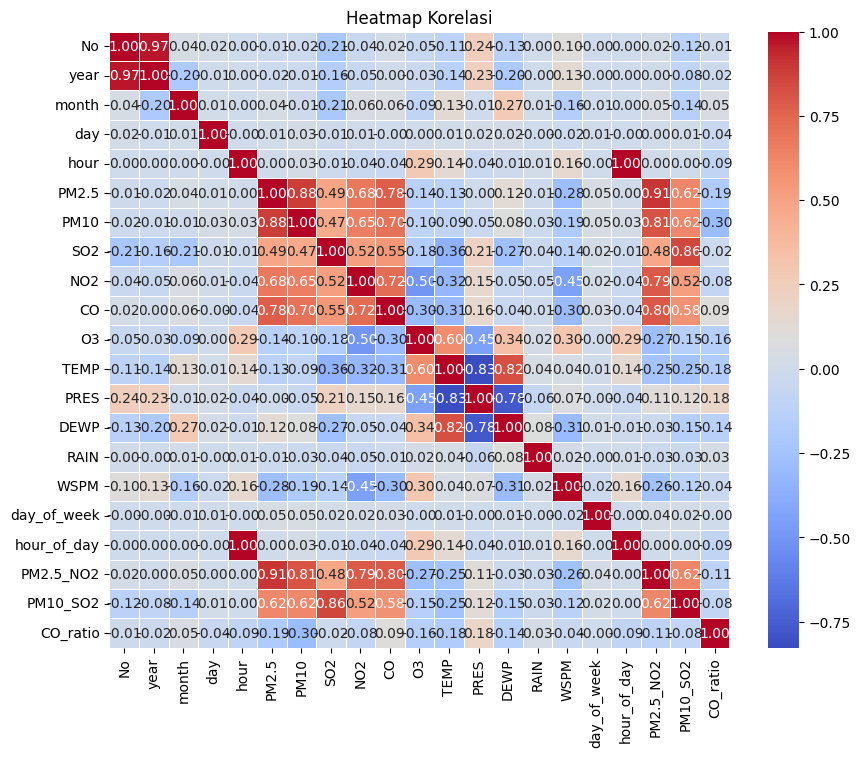

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi")
plt.show()

to answer the question


*How do PM2.5, PM10, NO2, SO2, and CO affect O3 (ozone)?*

**Feature Selection & Split Data**

In [16]:
features = ["PM2.5", "PM10", "NO2", "SO2", "CO", "PM2.5_NO2", "PM10_SO2", "CO_ratio"]
X = guanyuan_df[features]
y = guanyuan_df["O3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modeling**

In [17]:
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

y_pred_linreg = model_linreg.predict(X_test)

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [19]:
best_model = XGBRegressor(learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8, objective='reg:squarederror', random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# **Evaluation**

**Linear Regression model evaluation results**

In [20]:
mae = mean_absolute_error(y_test, y_pred_linreg)
mse = mean_squared_error(y_test, y_pred_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linreg)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 33.2607
Mean Squared Error (MSE): 2040.7282
Root Mean Squared Error (RMSE): 45.1744
R-squared (R²): 0.3554


**XGBoost model evaluation results**

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 23.6045
Mean Squared Error (MSE): 1170.6706
Root Mean Squared Error (RMSE): 34.2151
R-squared (R²): 0.6302


**Model performance**

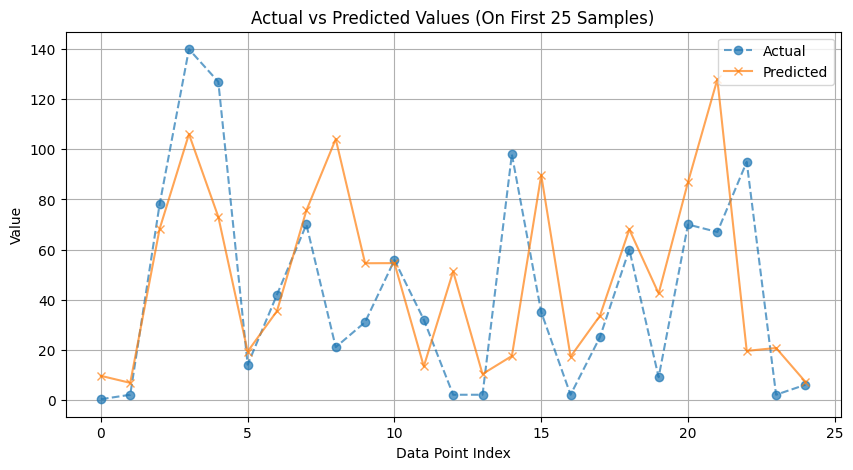

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:25], label="Actual", marker='o', linestyle='dashed', alpha=0.7)
plt.plot(y_pred[:25], label="Predicted", marker='x', linestyle='solid', alpha=0.7)
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values (On First 25 Samples)")
plt.legend()
plt.grid()
plt.show()

# **First Step Deployment**

**export data and other requirements needed for deployment**

Save Scaller & model to .pkl

In [23]:
joblib.dump(best_model, "best_xgboost_model.pkl")
joblib.dump(scaler, "robust_scaler.pkl")

['robust_scaler.pkl']

In [24]:
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,RAIN,wd,WSPM,station,season,day_of_week,hour_of_day,PM2.5_NO2,PM10_SO2,CO_ratio
date,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,-0.640449,-0.803738,0.277778,-0.680851,-0.777778,...,0.0,NNW,4.4,Guanyuan,Autumn,4,0,-0.427795,-0.236518,4.666293
2013-03-01 01:00:00,2,2013,3,1,1,-0.640449,-0.803738,0.222222,-0.744681,-0.777778,...,0.0,N,4.7,Guanyuan,Autumn,4,1,-0.429607,-0.238059,4.666293
2013-03-01 02:00:00,3,2013,3,1,2,-0.651685,-0.813084,0.055556,-0.702128,-0.777778,...,0.0,NNW,5.6,Guanyuan,Autumn,4,2,-0.431269,-0.246533,6.124509
2013-03-01 03:00:00,4,2013,3,1,3,-0.651685,-0.785047,-0.111111,-0.595745,-0.666667,...,0.0,NW,3.1,Guanyuan,Autumn,4,3,-0.429003,-0.241911,4.388537
2013-03-01 04:00:00,5,2013,3,1,4,-0.651685,-0.785047,-0.222222,-0.808511,-0.666667,...,0.0,N,2.0,Guanyuan,Autumn,4,4,-0.433535,-0.246533,4.388537


**Save Data To CSV**

In [25]:
final_df = guanyuan_df
final_df.to_csv("final_df.csv", index=False)